## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [36]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [37]:
df = pd.read_csv('data/scheduler_data.csv')

#### Show Top 5 Records

In [38]:
df.head()

,id_array_job,id_array_task,id_user,kill_requid,nodes_alloc,nodelist,cpus_req,derived_ec,exit_code,gres_req,...,time_submit,time_eligible,time_start,time_end,time_suspended,track_steps,tres_alloc,tres_req,job_type,id_job
0,41161693674,4595979483,66088413977,51671871839,0,[],1,0,256,NaN,...,3014,3014,3014,3014,-1,0,NaN,"1=1,2=5000,4=1,5=1,1002=2",OTHER,13715936505
1,41161693674,4595979483,66088413977,51671871839,1,['r2684277-n303509'],1,0,0,gpu:volta:2,...,3022,3022,3022,3025,-1,0,"1=1,2=9600,4=1,5=1,1002=2","1=1,2=9600,4=1,5=1,1002=2",OTHER,25780056187
2,41161693674,4595979483,16176946191,51671871839,1,['r5198790-n347934'],4,32512,32512,gpu:volta:1,...,5682,5682,5683,5684,-1,0,"1=4,2=38400,4=1,5=4,1002=1","1=4,2=38400,4=1,5=4,1002=1",OTHER,53722449986
3,41161693674,4595979483,16176946191,16176946191,1,['r3541344-n655125'],4,0,0,gpu:volta:1,...,34467,34467,34468,34548,-1,0,"1=4,2=20000,4=1,5=4,1002=1","1=4,2=20000,4=1,5=4,1002=1",OTHER,19989272070
4,41161693674,4595979483,16176946191,16176946191,1,['r3541344-n655125'],4,0,0,gpu:volta:1,...,34596,34596,34596,35108,-1,0,"1=4,2=20000,4=1,5=4,1002=1","1=4,2=20000,4=1,5=4,1002=1",OTHER,49220239266


In [39]:
df['total_time'] = df['time_end'] - df['time_start'] 
df.head()

,id_array_job,id_array_task,id_user,kill_requid,nodes_alloc,nodelist,cpus_req,derived_ec,exit_code,gres_req,...,time_eligible,time_start,time_end,time_suspended,track_steps,tres_alloc,tres_req,job_type,id_job,total_time
0,41161693674,4595979483,66088413977,51671871839,0,[],1,0,256,NaN,...,3014,3014,3014,-1,0,NaN,"1=1,2=5000,4=1,5=1,1002=2",OTHER,13715936505,0
1,41161693674,4595979483,66088413977,51671871839,1,['r2684277-n303509'],1,0,0,gpu:volta:2,...,3022,3022,3025,-1,0,"1=1,2=9600,4=1,5=1,1002=2","1=1,2=9600,4=1,5=1,1002=2",OTHER,25780056187,3
2,41161693674,4595979483,16176946191,51671871839,1,['r5198790-n347934'],4,32512,32512,gpu:volta:1,...,5682,5683,5684,-1,0,"1=4,2=38400,4=1,5=4,1002=1","1=4,2=38400,4=1,5=4,1002=1",OTHER,53722449986,1
3,41161693674,4595979483,16176946191,16176946191,1,['r3541344-n655125'],4,0,0,gpu:volta:1,...,34467,34468,34548,-1,0,"1=4,2=20000,4=1,5=4,1002=1","1=4,2=20000,4=1,5=4,1002=1",OTHER,19989272070,80
4,41161693674,4595979483,16176946191,16176946191,1,['r3541344-n655125'],4,0,0,gpu:volta:1,...,34596,34596,35108,-1,0,"1=4,2=20000,4=1,5=4,1002=1","1=4,2=20000,4=1,5=4,1002=1",OTHER,49220239266,512


#### Preparing X and Y variables

In [40]:
X = df.drop(columns=['total_time','id_array_task','gres_used'])

In [41]:
X.head()

,id_array_job,id_user,kill_requid,nodes_alloc,nodelist,cpus_req,derived_ec,exit_code,gres_req,gres_alloc,...,time_submit,time_eligible,time_start,time_end,time_suspended,track_steps,tres_alloc,tres_req,job_type,id_job
0,41161693674,66088413977,51671871839,0,[],1,0,256,NaN,NaN,...,3014,3014,3014,3014,-1,0,NaN,"1=1,2=5000,4=1,5=1,1002=2",OTHER,13715936505
1,41161693674,66088413977,51671871839,1,['r2684277-n303509'],1,0,0,gpu:volta:2,gpu:2,...,3022,3022,3022,3025,-1,0,"1=1,2=9600,4=1,5=1,1002=2","1=1,2=9600,4=1,5=1,1002=2",OTHER,25780056187
2,41161693674,16176946191,51671871839,1,['r5198790-n347934'],4,32512,32512,gpu:volta:1,gpu:1,...,5682,5682,5683,5684,-1,0,"1=4,2=38400,4=1,5=4,1002=1","1=4,2=38400,4=1,5=4,1002=1",OTHER,53722449986
3,41161693674,16176946191,16176946191,1,['r3541344-n655125'],4,0,0,gpu:volta:1,gpu:1,...,34467,34467,34468,34548,-1,0,"1=4,2=20000,4=1,5=4,1002=1","1=4,2=20000,4=1,5=4,1002=1",OTHER,19989272070
4,41161693674,16176946191,16176946191,1,['r3541344-n655125'],4,0,0,gpu:volta:1,gpu:1,...,34596,34596,34596,35108,-1,0,"1=4,2=20000,4=1,5=4,1002=1","1=4,2=20000,4=1,5=4,1002=1",OTHER,49220239266


In [42]:
# print("Categories in 'gender' variable:     ",end=" " )
# print(df['gender'].unique())

# print("Categories in 'race_ethnicity' variable:  ",end=" ")
# print(df['race_ethnicity'].unique())

# print("Categories in'parental level of education' variable:",end=" " )
# print(df['parental_level_of_education'].unique())

# print("Categories in 'lunch' variable:     ",end=" " )
# print(df['lunch'].unique())

# print("Categories in 'test preparation course' variable:     ",end=" " )
# print(df['test_preparation_course'].unique())

In [43]:
y = df['total_time']

In [44]:
y

0                0
1                3
2                1
3               80
4              512
            ...   
287168          20
287169          16
287170   -32001105
287171   -32001411
287172   -32001781
Name: total_time, Length: 287173, dtype: int64

In [45]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [46]:
X = preprocessor.fit_transform(X)

In [47]:
X.shape

(287173, 3534)

In [48]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((229738, 3534), (57435, 3534))

#### Create an Evaluate Function to give all metrics after model Training

In [49]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    # "Lasso": Lasso(),
     #"Ridge": Ridge(),
     #"K-Neighbors Regressor": KNeighborsRegressor(),
     #"Decision Tree": DecisionTreeRegressor(),
     "Random Forest Regressor": RandomForestRegressor(),
     #"XGBRegressor": XGBRegressor(), 
     #"CatBoosting Regressor": CatBoostRegressor(verbose=False),
     #"AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 229.7237
- Mean Absolute Error: 67.8063
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 221.1313
- Mean Absolute Error: 66.9100
- R2 Score: 1.0000


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 12230.8848
- Mean Absolute Error: 1518.4969
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 40580.4926
- Mean Absolute Error: 4508.6878
- R2 Score: 0.9999




### Results

In [51]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
1,Random Forest Regressor,0.999918


## Linear Regression

In [52]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


## Plot y_pred and y_test

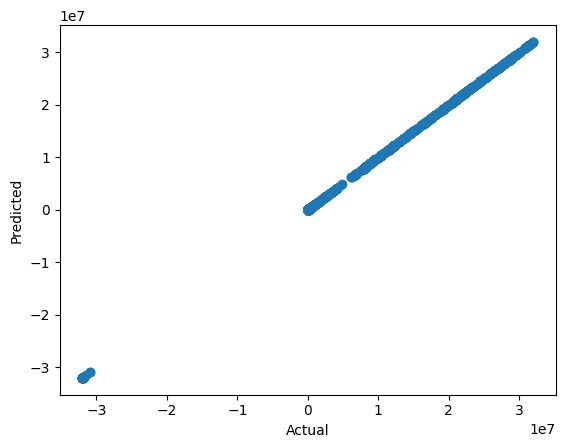

In [53]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

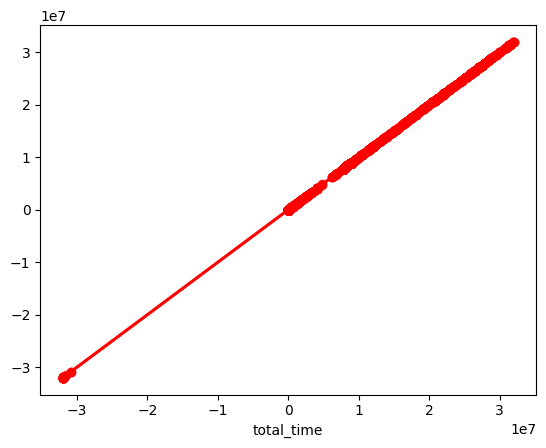

In [54]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [55]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
5398,53341,5.322514e+04,115.862712
45781,7950538,7.950542e+06,-4.099457
134550,8980908,8.980895e+06,13.221672
85461,0,-2.052554e+01,20.525541
147080,98,1.239918e+02,-25.991768
...,...,...,...
143551,62,8.057925e+01,-18.579246
139916,97,1.100946e+02,-13.094607
130994,1,2.026650e+01,-19.266503
193371,1132,1.135959e+03,-3.959358
